acceptance rate for chain 1 is 0.62
acceptance rate for chain 2 is 0.62


/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:87: RuntimeWarning: divide by zero encountered in divide


acceptance rate for chain 3 is 0.72
acceptance rate for chain 2 is 0.62


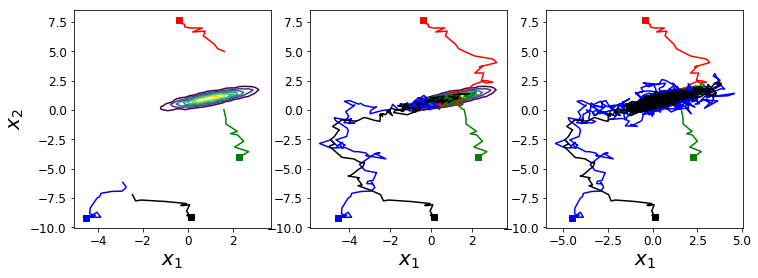

In [3]:
#now redo this rand draw with Metropolis algorithm
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

mu = np.array([1.,1.])
s1 = 1.
s2 = 0.2
rho = 0.8
cov = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2),s2]])
#generate random numbers from 2D normal distribution
xx = np.random.multivariate_normal(mu,cov,100000) 
xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2.
#make 2d histogram
hxx,xedge,yedge = np.histogram2d(xx[:,0],xx[:,1],bins=[xgrid,ygrid])

N = 10000
#4 walkers
xx_g1 = np.zeros((N,2))
xx_g2 = np.zeros((N,2))
xx_g3 = np.zeros((N,2))
xx_g4 = np.zeros((N,2))

pp1 = np.zeros((N,1))
pp2 = np.zeros((N,1))
pp3 = np.zeros((N,1))
pp4 = np.zeros((N,1))

cov_prop = np.array([[0.1,0.0],[0.0,0.1]])

#chain 1
xx_g1[0,:] = np.random.uniform(-10.,10.,size=2)
pp1[0] = stats.multivariate_normal.pdf(xx_g1[0,:],mu,cov)
n_acc = 0
n_all = 0
for i in range(1,10000):
    #draw the poprsal quantity from the proposal distribution
    xx = np.random.multivariate_normal(xx_g1[i-1,:],cov_prop,1)
    p1 = stats.multivariate_normal.pdf(xx, mu,cov)
    r0 = p1/pp1[i-1]
    if np.random.rand()<r0:
        xx_g1[i,:] = xx
        pp1[i] = p1
        n_acc += 1
    else:
        xx_g1[i,:] = xx_g1[i-1,:]
        pp1[i] = pp1[i-1]
    n_all += 1
print 'acceptance rate for chain 1 is %(n).2f' % {'n': n_acc/float(n_all)}

#chain 2
xx_g2[0,:] = np.random.uniform(-10.,10.,size=2)
pp2[0] = stats.multivariate_normal.pdf(xx_g2[0,:],mu,cov)
n_acc = 0
n_all = 0
for i in range(1,10000):
    #draw the poprsal quantity from the proposal distribution
    xx = np.random.multivariate_normal(xx_g2[i-1,:],cov_prop,1)
    p1 = stats.multivariate_normal.pdf(xx, mu,cov)
    r0 = p1/pp2[i-1]
    if np.random.rand()<r0:
        xx_g2[i,:] = xx
        pp2[i] = p1
        n_acc += 1
    else:
        xx_g2[i,:] = xx_g2[i-1,:]
        pp2[i] = pp2[i-1]
    n_all += 1
print 'acceptance rate for chain 2 is %(n).2f' %\
    {'n': n_acc/float(n_all)}

#chain 3
xx_g3[0,:] = np.random.uniform(-10.,10.,size=2)
pp3[0] = stats.multivariate_normal.pdf(xx_g3[0,:],mu,cov)
n_acc = 0
n_all = 0
for i in range(1,10000):
    #draw the poprsal quantity from the proposal distribution
    xx = np.random.multivariate_normal(xx_g3[i-1,:],cov_prop,1)
    p1 = stats.multivariate_normal.pdf(xx, mu,cov)
    r0 = p1/pp3[i-1]
    if np.random.rand()<r0:
        xx_g3[i,:] = xx
        pp3[i] = p1
        n_acc += 1
    else:
        xx_g3[i,:] = xx_g3[i-1,:]
        pp2[i] = pp2[i-1]
    n_all += 1
print 'acceptance rate for chain 3 is %(n).2f' %\
    {'n': n_acc/float(n_all)}

#chain 4
xx_g4[0,:] = np.random.uniform(-10.,10.,size=2)
pp4[0] = stats.multivariate_normal.pdf(xx_g4[0,:],mu,cov)
n_acc = 0
n_all = 0
for i in range(1,10000):
    #draw the poprsal quantity from the proposal distribution
    xx = np.random.multivariate_normal(xx_g4[i-1,:],cov_prop,1)
    p1 = stats.multivariate_normal.pdf(xx, mu,cov)
    r0 = p1/pp4[i-1]
    if np.random.rand()<r0:
        xx_g4[i,:] = xx
        pp4[i] = p1
        n_acc += 1
    else:
        xx_g4[i,:] = xx_g4[i-1,:]
        pp4[i] = pp4[i-1]
    n_all += 1
print 'acceptance rate for chain 2 is %(n).2f' %\
    {'n': n_acc/float(n_all)}



xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2.
hxx_g1,xedge,yedge = np.histogram2d(\
    xx_g1[:,0],xx_g1[:,1],bins=[xgrid,ygrid])
hxx_g2,xedge,yedge = np.histogram2d(\
    xx_g2[:,0],xx_g2[:,1],bins=[xgrid,ygrid])
hxx_g3,xedge,yedge = np.histogram2d(\
    xx_g3[:,0],xx_g3[:,1],bins=[xgrid,ygrid])
hxx_g4,xedge,yedge = np.histogram2d(\
    xx_g4[:,0],xx_g4[:,1],bins=[xgrid,ygrid])
hxx = hxx_g1 + hxx_g2 + hxx_g3 + hxx_g4

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(131)
n = 20
ax.plot(xx_g1[0:n,0],xx_g1[0:n,1],'r')
ax.plot(xx_g2[0:n,0],xx_g2[0:n,1],'g')
ax.plot(xx_g3[0:n,0],xx_g3[0:n,1],'b')
ax.plot(xx_g4[0:n,0],xx_g4[0:n,1],'k')
ax.plot(xx_g1[0,0],xx_g1[0,1],'rs')
ax.plot(xx_g2[0,0],xx_g2[0,1],'gs')
ax.plot(xx_g3[0,0],xx_g3[0,1],'bs')
ax.plot(xx_g4[0,0],xx_g4[0,1],'ks')
ax.contour(xcenter,ycenter,hxx.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)

ax = fig.add_subplot(132)
n = 200
ax.plot(xx_g1[0:n,0],xx_g1[0:n,1],'r')
ax.plot(xx_g2[0:n,0],xx_g2[0:n,1],'g')
ax.plot(xx_g3[0:n,0],xx_g3[0:n,1],'b')
ax.plot(xx_g4[0:n,0],xx_g4[0:n,1],'k')
ax.plot(xx_g1[0,0],xx_g1[0,1],'rs')
ax.plot(xx_g2[0,0],xx_g2[0,1],'gs')
ax.plot(xx_g3[0,0],xx_g3[0,1],'bs')
ax.plot(xx_g4[0,0],xx_g4[0,1],'ks')
ax.contour(xcenter,ycenter,hxx.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
#ax.set_ylabel(r'$x_2$',fontsize=20)

ax = fig.add_subplot(133)
n = 1000
ax.plot(xx_g1[0:n,0],xx_g1[0:n,1],'r')
ax.plot(xx_g2[0:n,0],xx_g2[0:n,1],'g')
ax.plot(xx_g3[0:n,0],xx_g3[0:n,1],'b')
ax.plot(xx_g4[0:n,0],xx_g4[0:n,1],'k')
ax.plot(xx_g1[0,0],xx_g1[0,1],'rs')
ax.plot(xx_g2[0,0],xx_g2[0,1],'gs')
ax.plot(xx_g3[0,0],xx_g3[0,1],'bs')
ax.plot(xx_g4[0,0],xx_g4[0,1],'ks')
ax.contour(xcenter,ycenter,hxx.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
#ax.set_ylabel(r'$x_2$',fontsize=20)
fig.show()

fig.savefig('Metropolis_sample.png',bbox_tight='tight')